In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro as N

### First, we initialize the necessary inputs:

Parameters of Lennord-Jones Potential: Epsilon, eps = 0.0104 eV and Sigma, sig = 3.40 Å

The timestep, dt  = 0.001 ps

Number of steps, n = 100000

Mass of Argon atom, m = 39.948 amu = 39.948 * (1/N) grams = 39.948/N g (Here, N is Avogadro number)

Initial position of atom, x_0 = 7.5 Å

Initial velocity of atom, v_0 = 0 Å/ps

In [255]:
eps = 0.0104 #in Electron-Volt (eV)
sig = 3.40 #in Angstrom (Å)
dt = 0.001 #in picosecond (ps)
n = 100000
m = (39.948/N) #in grams (g)
x_0 = 7.5 #in Angstrom (Å)
v_0 = 0 #in Angstrom/picosecond (Å/ps)

#### Defining functions for Potential Energy, Force and Kinetic Energy:

Potential Energy (in eV) of atom in accordance with Lennord-Jones Potential is given by U(x) = 4 * Epsilon * ((Sigma/x) ** 12 - (Sigma/x) ** 6)

In [256]:
def Potential_Energy(eps, sig, x):
    return 4*eps*((sig/x)**12-(sig/x)**6)

Force (in eV/Å) on the atom is given by F(x) = -d(U(x))/dx = 4 * Epsilon * (12 * ((Sigma) ** 12/(x) ** 12) - (6 * (Sigma) ** 6/(x) ** 6))

In [257]:
def Force(eps, sig, x):
    return 4*eps*(12*((sig)**12/(x)**13)-6*((sig)**6/(x)**7))

Kinetic Energy (in eV) of atom is given by K.E. = 1/2 * m * v * v

As velocity is in Å/ps and mass is in g, we have to find conversion factor to convert K.E. to units of eV

K.E. = mass * velocity * velocity = g * (Å/ps)^2 = (1e-3)kg * ((1e-10) * m/(1e-12) * s)^2 = 10 J = 10/(1.602e-19) eV = (1e20/1.602) eV [J = 1/(1.602e-19) eV]

In [258]:
def Kinetic_Energy(m, v):
    return (0.5*m*v*v*1e20)/1.602

For the purposes of updating position and velocity, we create an acceleration function that returns the acceleration a(x) at any given position x in Å/(ps)^2

As the Force function is in eV/Å, we have to find conversion factor to convert acceleration to units of Å/(ps)^2

Acceleration = Force/Mass = (eV/Å)/g = (1.602e-19 kg * (1e10 Å)^2) / ((1e12 ps)^2 * (1e-3)kg * Å) = 1.602e-20 * (Å/(ps)^2)

In [259]:
def a(m, eps, sig, x):
    return (Force(eps, sig, x)/m)*1.602e-20
    

Verlet's Algorithm to update position and velocity after timestep dt is given by:

x(t+dt) = 2 * x(t) - x(t-dt) + a(t) * dt * dt

v(t) = (x(t+dt) - x(t-dt))/(2*dt)

Initial conditions are x(0) = x_0 = 7.5 Å and v(0) = v_0 = 0 Å/ps

To advance x, we also compute x(dt) = x(0 + dt) = x(0) + v(0) * dt = x_0 + v_0 * dt

In [260]:
x = np.zeros(n+2, dtype=float)
v = np.zeros(n, dtype=float)
t = np.zeros(n, dtype=float)
x[0], v[0], t[0] = x_0, v_0, 0
x[1] = x_0 + v_0*dt
for i in range(1, n):
    t[i] += dt + t[i-1]
    x[i+1] = 2*x[i]- x[i-1] + a(m, eps, sig, x[i])*dt*dt
    v[i] = (x[i+1]-x[i-1])/(2*dt)

### Plot of Potential Energy (U) and Force (F) as functions of position (x):

To calculate the position at which Potential Energy is minimum, we find the index 'i' at which Pot_x[i] has the smallest value.

Then, the corresponding position of minimum is just x[i].

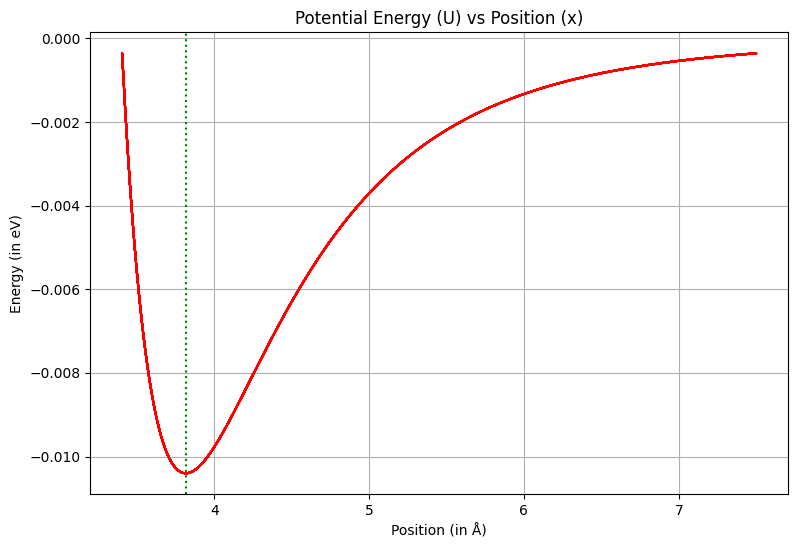

Position at which Potential Energy is minimum is at x = 3.8163586152072613


In [261]:
Pot_x = Potential_Energy(eps, sig, x[0:n])
minindex = np.argmin(Pot_x)
plt.figure(figsize=(9, 6))
plt.title("Potential Energy (U) vs Position (x)")
plt.plot(x[0:n], Pot_x, color = 'r', ls = 'dashdot')
plt.axvline(x=x[minindex], color = 'green', ls = 'dotted')
plt.xlabel("Position (in Å)")
plt.ylabel("Energy (in eV)")
plt.grid(True)
plt.show()
print("Position at which Potential Energy is minimum is at x =",x[minindex])

Now, we calculate Force at minima of Potential Energy, which is just For_x[i]. Here, we get For_x[i] = 6.349109025372002e-07, which can be approximated to 0. Now at minima, d(U(x))/dx = 0. As F(x) = -d(U(x))/dx, we have that at point of minima, F(x) = 0, which closely matches with our numerically obtained value of F at minima.

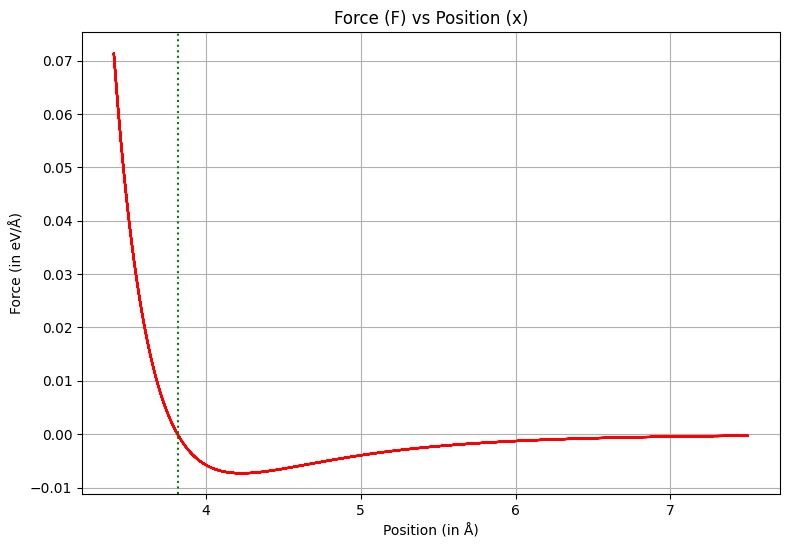

Force at minima of Potential Energy is 6.349109025372002e-07


In [262]:
For_x = Force(eps, sig, x[0:n])
plt.figure(figsize=(9, 6))
plt.title("Force (F) vs Position (x)")
plt.plot(x[0:n], For_x, color = 'r', ls = 'dashdot')
plt.axvline(x=x[minindex], color = 'green', ls = 'dotted')
plt.xlabel("Position (in Å)")
plt.ylabel("Force (in eV/Å)")
# plt.xlim(3,4)
plt.grid(True)
plt.show()
print("Force at minima of Potential Energy is", For_x[minindex])

#### Plot of Momentum against Position of atom:

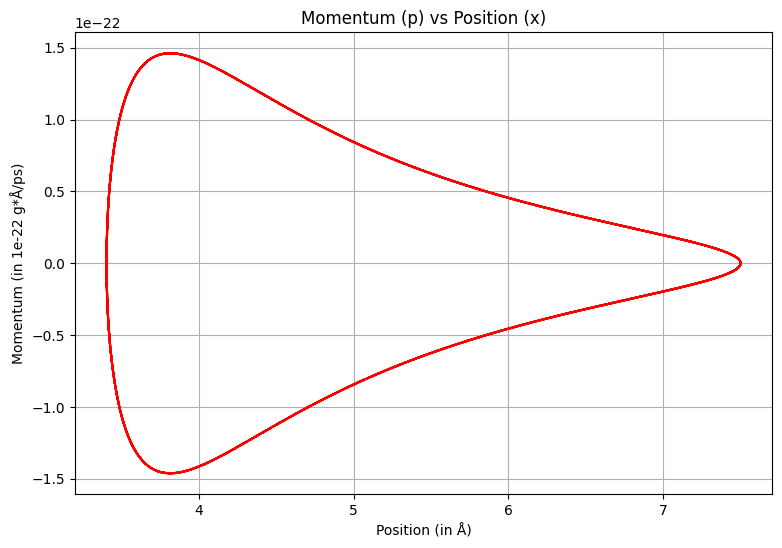

In [264]:
Mom_x = m*v
plt.figure(figsize=(9, 6))
plt.plot(x[0:n], Mom_x, color = 'r', ls = 'dashdot')
plt.title("Momentum (p) vs Position (x)")
plt.xlabel("Position (in Å)")
plt.ylabel("Momentum (in 1e-22 g*Å/ps)")
plt.grid(True)
plt.show()

To determine the sensitivity of the observations to timestep value, we can plot Momentum vs Position for various values of timestep 'dt' and determine from the plots the approximate ranges of stability/unstability.

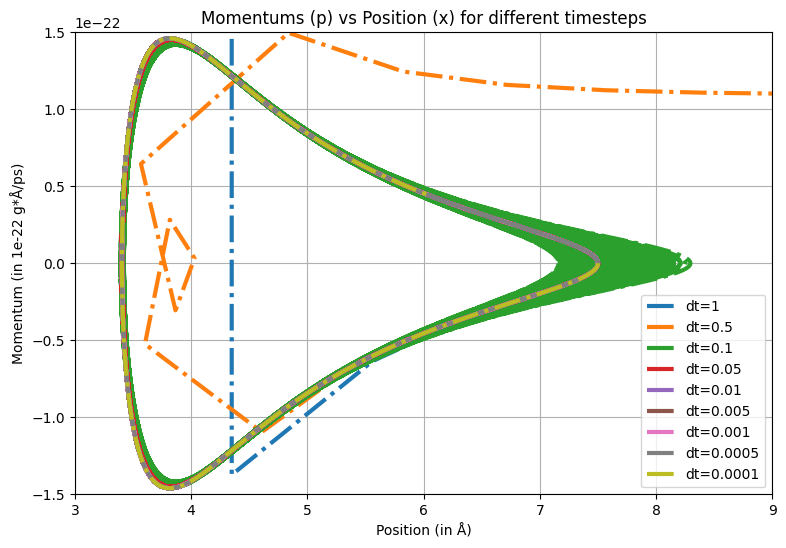

In [265]:
delt = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
# colors = ['black', 'red', 'darkgreen', 'navy', 'gray', 'darkmagenta', 'indigo', 'darkslategray', 'teal']
plt.figure(figsize=(9, 6))
plt.title("Momentums (p) vs Position (x) for different timesteps")
plt.xlabel("Position (in Å)")
plt.ylabel("Momentum (in 1e-22 g*Å/ps)")
plt.grid(True)
plt.xlim(3, 9)
plt.ylim(-1.5e-22, 1.5e-22)
for j in range(8, -1, -1):
    x_ver = np.zeros(n+2, dtype=float)
    v_ver = np.zeros(n, dtype=float)
    x_ver[0], v_ver[0] = x_0, v_0
    x_ver[1] = x_0 + v_0*delt[j]
    for i in range(1, n):
        x_ver[i+1] = 2*x_ver[i]- x_ver[i-1] + a(m, eps, sig, x_ver[i])*delt[j]*delt[j]
        v_ver[i] = (x_ver[i+1]-x_ver[i-1])/(2*delt[j])
    Mom_x = m*v_ver
    plt.plot(x_ver[0:n], Mom_x, ls = 'dashdot', lw=3, label = 'dt='+str(delt[j]))
plt.legend()
plt.show()

From the above plot, we can make the following observations:

1. For values of dt < 0.1, i.e., dt = 0.0001, 0.0005, 0.001, 0.005, 0.01, the plot of Momentum vs Position curve remains relatively stable and closed without any major fluctuations, indicating stability upto values of dt < 0.1.

2. When dt = 0.1, the instability of the plot begins to show without the scheme completely blowing up. So for values of dt ~ 0.1, the plot starts becoming unstable.

3. For values of dt > 0.1 however, the system completely blows up as the previously closed shape of Momentum vs Position breaks apart, showing complete instability.

From these observations, we can conclude that the system considering the initial condition remains relatively insensitive for values of dt <= 0.1 and after passing that threshold, the system becomes highly sensitive, blowing up for increasing values of dt > 0.1.

In [263]:
Initial_Tot_x = Kinetic_Energy(m, v_0) + Potential_Energy(eps, sig, x_0)
print(Initial_Tot_x)

-0.00035794247903261374


For the initial starting position and velocity taken here (x_0 = 7.5 Å, v_0 = 0 Å/ps), the plot of Momentum vs Position remains a closed curve, indicated stability as time progresses. This is because the Total Energy of the system is negative (TE = -0.000358 eV) and hence the system is bound and won't blow up as time progresses.

Now, if we want to find the initial position for which oscillations become unstable, we have to determine the initial position 'x_0' for which the Total Energy of the system is positive, as the system becomes free/unbound then.

As initial velocity v_0 = 0, Total Energy = U(x_0)

Set Total Energy > 0

Therefore, 4 * Epsilon * ((Sigma/x_0) ** 12 - (Sigma/x_0) ** 6) > 0

Simplifying, we get x_0 < Sigma.

Here, Sigma = 3.40 Å, so, if we choose initial position 'x_0' such that it is less than 3.40 Å, Total Energy of system becomes positive, causing the system to become unbound. Therefore, the system will have unstable oscillations.

#### Plotting Energies as functions of time:

Below are the plots of Potential Energy, Kinetic Energy and Total Energy as functions of time.

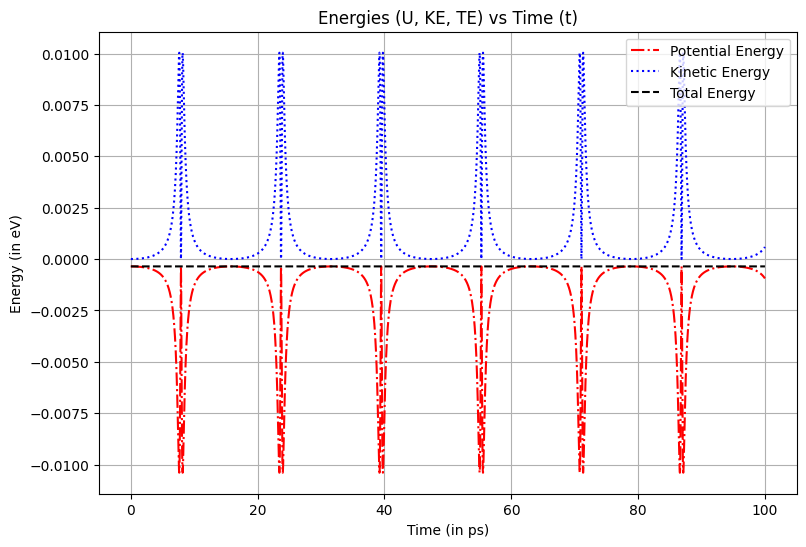

In [266]:
Pot_x = Potential_Energy(eps, sig, x[0:n])
Kin_x = Kinetic_Energy(m, v)
Tot_x = Pot_x+Kin_x
plt.figure(figsize=(9, 6))
plt.title("Energies (U, KE, TE) vs Time (t)")
plt.plot(t, Pot_x, color = 'r', ls = 'dashdot', label = 'Potential Energy')
plt.ylabel("Energy (in eV)")
plt.xlabel("Time (in ps)")
plt.plot(t, Kin_x, color = 'b', ls = 'dotted', label = 'Kinetic Energy')
plt.plot(t, Tot_x, color = 'k', ls = 'dashed', label = 'Total Energy')
# plt.ylim(-0.00036, -0.0003575)
plt.legend()
plt.grid(True)
plt.show()


To determine whether the Total Energy is conserved, we plot difference of Total Energy at any point in time and Initial Total Energy against time. Here, the difference is of the order of 1e-8 eV, so we can say that within reasonable error, that Total Energy doesn't vary too much as the time progresses. Hence, the Total Energy of the system (again within reasonable error) is conserved for this duration.

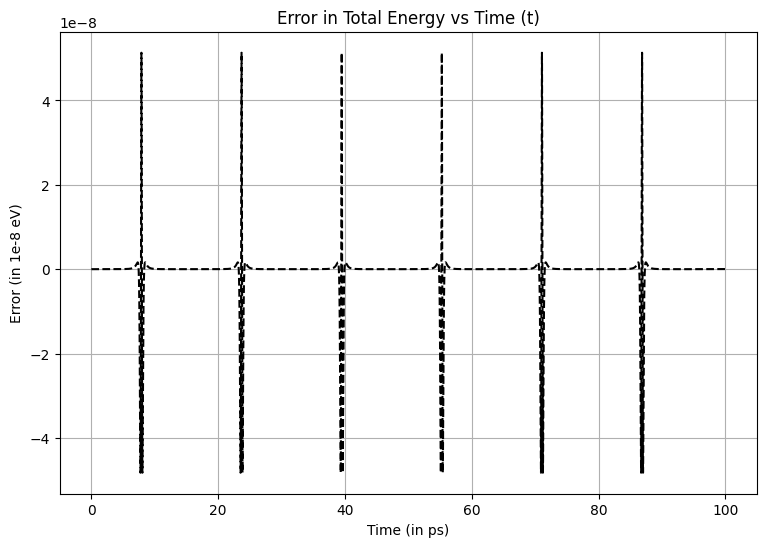

In [267]:
Initial_Tot_x = Kinetic_Energy(m, v_0) + Potential_Energy(eps, sig, x_0)
Error = Tot_x - Initial_Tot_x
plt.figure(figsize=(9, 6))
plt.title("Error in Total Energy vs Time (t)")
plt.plot(t, Error, color = 'k', ls = 'dashed', label = 'Error')
plt.ylabel("Error (in 1e-8 eV)")
plt.xlabel("Time (in ps)")
plt.grid(True)
plt.show()